In [16]:
#do clustering here, parts b) and c)

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

import matplotlib.pyplot as plt

In [23]:
full_df = pd.read_csv('data.csv')
df = full_df.drop(columns=['_stemmed', '_title'])
display(full_df)

,aanmdof,aanmdof robot,abandon,abattoir,abe,abe scheme,abil,abil detect,abil learn,abil model,...,zip,zipper,zolb,zone,zupt,zynq,œuf,μm,_stemmed,_title
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,anomali detect wide area imageri studi detect ...,Anomaly detection in wide area imagery
1,0.0,0.0,0.0,0.0,0.0,0.0,0.023310,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,person re-identif deep kronecker-product match...,Person re-identification with deep kronecker-p...
2,0.0,0.0,0.0,0.0,0.0,0.0,0.084704,0.153873,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,crack detect imag masonri use cnn signific bod...,Crack detection in images of masonry using cnns
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,toward energi effici code gener mobil phone us...,Towards an energy efficient code generator for...
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,sub-polyhedr schedul use unit- two-variable-pe...,Sub-polyhedral scheduling using (Unit-)two-var...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.06849,0.0,0.0,0.0,0.0,colorimetr point-of-car paper-bas sensor urina...,Colorimetric point-of-care paper-based sensors...
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,calcium identif score base echocardiographi ex...,Calcium identification and scoring based on ec...
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,consid filter import irreplac filter prune dee...,Considering filter importance and irreplaceabi...
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,low-complex bit-seri sequenti polynomi basi fi...,Low-complexity bit-serial sequential polynomia...


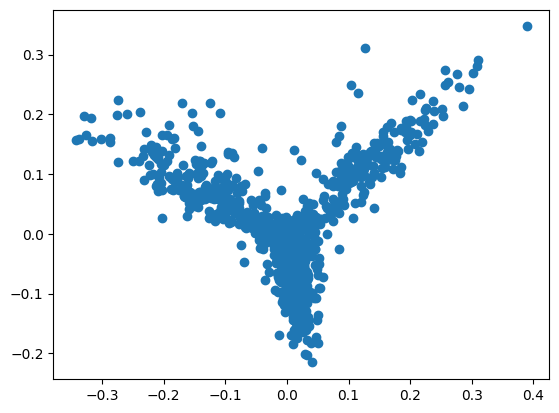

In [30]:
pca = PCA(n_components=2).fit_transform(df)
plt.scatter(pca[:, 0], pca[:, 1])

# no idea why plot looks this way

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


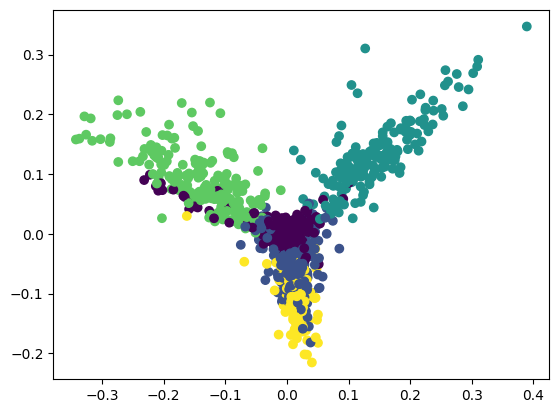

Davies-Bouldin score: 8.666823810418816
Top words for each cluster:


compil       0.089917
program      0.049818
code         0.038834
languag      0.038095
optim        0.027515
quantum      0.027475
graph        0.027131
memori       0.026087
parallel     0.024884
transform    0.022406
dtype: float64

imag             0.042789
detect           0.033708
method           0.028681
vision           0.027555
use              0.024478
model            0.023707
learn            0.022634
comput vision    0.022429
object           0.022381
comput           0.021524
dtype: float64

databas          0.133937
data             0.073150
relat            0.068867
queri            0.063847
relat databas    0.056957
sql              0.035705
system           0.032360
ontolog          0.032280
inform           0.028138
model            0.028131
dtype: float64

secur           0.093267
encrypt         0.059365
quantum         0.047222
scheme          0.046187
key             0.044709
cryptographi    0.042700
protocol        0.039639
attack          0.036972
iot             0.033500
data            0.031640
dtype: float64

robot      0.134195
control    0.039213
soft       0.026589
system     0.026187
task       0.024966
environ    0.020317
learn      0.019422
use        0.018865
simul      0.018511
human      0.018275
dtype: float64

In [75]:
# 3 and 5 give most meaningful results
K = 5

kmeans = KMeans(n_clusters=K)
kmeans.fit(df)
y_pred = kmeans.predict(df)
plt.scatter(pca[:, 0], pca[:, 1], c=y_pred)
plt.show()

print('Davies-Bouldin score:', davies_bouldin_score(df, y_pred))

df_pred = df.copy()
df_pred['_cluster'] = y_pred

print('Top words for each cluster:')
for i in range(K):
    display(df_pred[df_pred['_cluster'] == i].drop(columns='_cluster').mean().sort_values(ascending=False).iloc[:10])
    
# With K = 3 documents are split into 3 topics: Computer Vision, Databases and Cryptography

# K = 4 didn't work really well in my opinion

# With K = 5 documents are split into 5 topics: Programming Languages, Cryptography, Databases, Robotics, Computer Vision

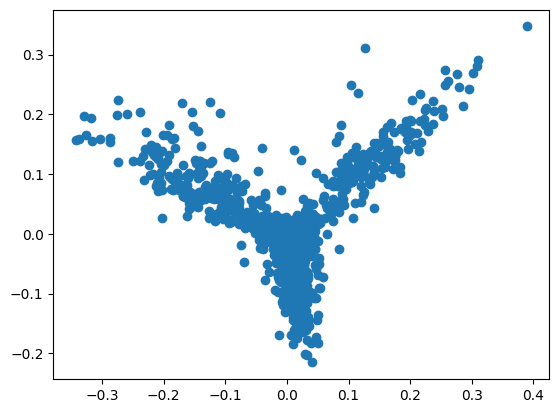

In [66]:
#part c
#Dimension reduction

pca_2 = PCA(n_components=2).fit_transform(df)
plt.scatter(pca_2[:, 0], pca_2[:, 1])

# no idea why plot looks this way

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


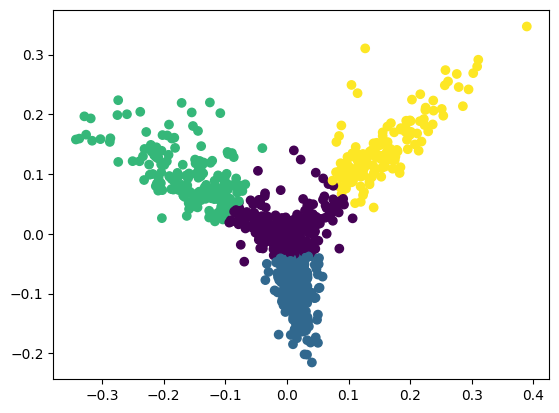

Davies-Bouldin score: 0.6368152598338835
Top words for each cluster:


compil     0.050894
program    0.029854
code       0.023659
languag    0.023495
system     0.023247
use        0.022522
data       0.020338
graph      0.018938
comput     0.017819
optim      0.017775
dtype: float64

robot     0.052541
imag      0.027215
detect    0.026090
method    0.025260
learn     0.024682
use       0.023661
model     0.022944
object    0.020701
system    0.020073
vision    0.019644
dtype: float64

secur           0.093722
quantum         0.082520
encrypt         0.053372
scheme          0.046061
key             0.044418
cryptographi    0.041504
protocol        0.036304
attack          0.035956
iot             0.034749
data            0.029413
dtype: float64

databas          0.148719
relat            0.076786
data             0.076521
queri            0.072645
relat databas    0.063434
sql              0.038971
ontolog          0.036571
system           0.032101
schema           0.030394
approach         0.027962
dtype: float64

In [68]:
#part c

# 3 and 5 give most meaningful results
K_2 = 4

kmeans = KMeans(n_clusters=K_2)
kmeans.fit(pca_2)
y_pred_2 = kmeans.predict(pca_2)
plt.scatter(pca_2[:, 0], pca_2[:, 1], c=y_pred_2)
plt.show()

print('Davies-Bouldin score:', davies_bouldin_score(pca_2, y_pred_2))

df_pred_2 = df.copy()
df_pred_2['_cluster'] = y_pred_2

print('Top words for each cluster:')
for i in range(K_2):
    display(df_pred_2[df_pred_2['_cluster'] == i].drop(columns='_cluster').mean().sort_values(ascending=False).iloc[:10])
    
# With K = 3 documents are split into 3 topics: Computer Vision, Databases and Cryptography

# With K = 4 documents are split into 4 topics: Robotics, Programming Languages, Databases, and Cryptography

# With K = 5 documents are split into 5 topics: Programming Languages, Cryptography, Databases, Robotics, Computer Vision